In [1]:
import os
import time
import pandas as pd
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf
from sklearn.cluster import MiniBatchKMeans

In [2]:
# Load from HDF5 file

project = os.path.realpath('./..')
datadir = os.path.join(project, 'data')

with pd.HDFStore(os.path.join(datadir, 'tweets_1M.h5')) as store:
    subset = store.tweets_subset

In [3]:
# Convert the lat and lng columns to numpy array
data = subset.as_matrix(columns=['lat', 'lng'])

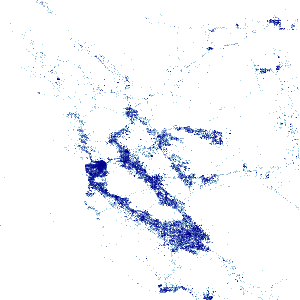

In [4]:
# Visualize points with datashader

cvs = ds.Canvas(plot_width=300, plot_height=300)
agg = cvs.points(subset, 'lng', 'lat')
tf.interpolate(agg)

In [8]:
# Prepare the minibatch kmeans model object

mini_batch = MiniBatchKMeans(n_clusters=3,
                          init='k-means++',
                          n_init=10)

In [9]:
# Start timer
t0 = time.time()

# Fit the data and save timing
mini_batch.fit(data)
mini_batch_time = time.time() - t0
print mini_batch_time

# Add fitted label back into DataFrame
subset['cluster'] = mini_batch.labels_

0.160804033279


/home/paul/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:1279: DeprecationWarning: This function is deprecated. Please call randint(0, 99999 + 1) instead
  0, n_samples - 1, init_size)
/home/paul/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 99999 + 1) instead
  0, n_samples - 1, init_size)
/home/paul/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 99999 + 1) instead
  0, n_samples - 1, init_size)
/home/paul/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 99999 + 1) instead
  0, n_samples - 1, init_size)
/home/paul/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 99999 + 1) instead
  0, n_sam

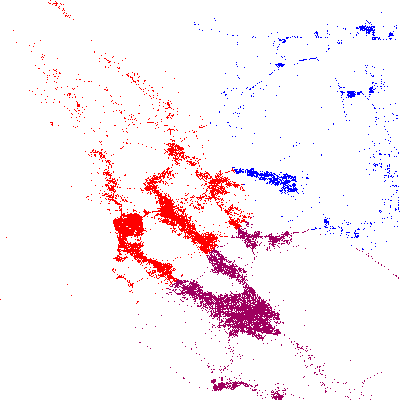

In [10]:
# Visualize points with datashader
cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(subset, 'lng', 'lat', ds.mean('cluster'))
tf.interpolate(agg, cmap=['red', 'blue'])